# Install Require System

In [1]:
!sudo apt update
!sudo apt install -y libmagic-dev
%pip install imbalanced-learn

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]33m
Fetched 336 kB in 2s (139 kB/s)    
Reading package lists... Done
Building dependency tree       
Reading state information... Done
43 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmagic-dev is already the newest version (1:5.38-4).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Note: you may need to restart the kernel to use updated packages.


# Crate Directory and Output File

In [2]:
#Use '/resource' to syncronize folder with host

!mkdir -p ~/output/labeled-data/multi

dataset_path = "/home/jovyan/Dataset"
output_path  = "/home/jovyan/output/labeled-data/multi"

# Import Package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

# Train Data

In [4]:
train_data = pd.read_csv(dataset_path+'/Botnet-Training.csv')
train_data

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,10/08/2011 04:01:40 PM,59086131,8,0,...,0,2987276.0,0.0,2987276.0,2987276.0,3.282417e+14,6.564834e+14,1.312967e+15,5.999291e+06,NeedManualLabel
1,147.32.84.180-147.32.84.255-137-137-17,147.32.84.180,137,147.32.84.255,137,17,10/08/2011 04:04:23 PM,12452268,38,0,...,8,0.0,0.0,0.0,0.0,1.312967e+15,0.000000e+00,1.312967e+15,1.312967e+15,NeedManualLabel
2,147.32.84.180-147.32.80.9-1025-53-17,147.32.84.180,1025,147.32.80.9,53,17,10/08/2011 04:04:24 PM,118741070,6,3,...,8,2276383.0,0.0,2276383.0,2276383.0,6.564836e+14,9.284078e+14,1.312967e+15,1.161281e+08,NeedManualLabel
3,147.32.84.180-94.63.149.152-1040-80-6,147.32.84.180,1040,94.63.149.152,80,6,10/08/2011 04:06:36 PM,180643,26,10,...,20,0.0,0.0,0.0,0.0,1.312967e+15,0.000000e+00,1.312967e+15,1.312967e+15,NeedManualLabel
4,147.32.84.180-94.63.149.152-1040-80-6,147.32.84.180,1040,94.63.149.152,80,6,10/08/2011 04:06:36 PM,440,5,0,...,20,0.0,0.0,0.0,0.0,1.312967e+15,0.000000e+00,1.312967e+15,1.312967e+15,NeedManualLabel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356154,172.16.2.12-83.35.250.221-30319-65347-17,172.16.2.12,30319,83.35.250.221,65347,17,08/10/2007 09:41:36 PM,51204298,2,1,...,8,258803.0,0.0,258803.0,258803.0,5.959273e+14,8.427684e+14,1.191854e+15,5.094550e+07,NeedManualLabel
356155,207.46.170.10-192.168.1.104-80-18953-6,207.46.170.10,80,192.168.1.104,18953,6,12/06/2010 10:23:31 PM,235,1,1,...,20,0.0,0.0,0.0,0.0,1.276356e+15,0.000000e+00,1.276356e+15,1.276356e+15,NeedManualLabel
356156,142.166.14.69-192.168.2.113-80-1387-6,142.166.14.69,80,192.168.2.113,1387,6,12/06/2010 02:50:00 PM,174,1,1,...,20,0.0,0.0,0.0,0.0,1.276329e+15,0.000000e+00,1.276329e+15,1.276329e+15,NeedManualLabel
356157,192.168.5.122-198.164.30.2-59564-53-17,192.168.5.122,59564,198.164.30.2,53,17,12/06/2010 02:33:39 PM,383414,1,1,...,8,0.0,0.0,0.0,0.0,1.276328e+15,0.000000e+00,1.276328e+15,1.276328e+15,NeedManualLabel


## Handling Missing Drop

In [5]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

#train_data.dropna(inplace=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
train_data.isnull().sum()

Flow ID                       0
Src IP                        0
Src Port                      0
Dst IP                        0
Dst Port                      0
Protocol                      0
Timestamp                     0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  3
Flow Packets/s                3
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT 

In [6]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Flow ID                       0
Src IP                        0
Src Port                      0
Dst IP                        0
Dst Port                      0
Protocol                      0
Timestamp                     0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT 

In [7]:
#Neris
train_data.loc[(train_data['Src IP']=='147.32.84.180')| 
               (train_data['Dst IP']=='147.32.84.180'), 'Label'] = 1
#Rbot
train_data.loc[(train_data['Src IP']=='147.32.84.170') | 
               (train_data['Dst IP']=='147.32.84.170'), 'Label'] = 2
#virut
train_data.loc[(train_data['Src IP']=='147.32.84.160')| 
               (train_data['Dst IP']=='147.32.84.160'), 'Label'] = 3
#irc
train_data.loc[(train_data['Src IP']=='192.168.5.122') & (train_data['Dst IP']=='198.164.30.2'), 'Label'] = 4
train_data.loc[(train_data['Src IP']=='192.168.2.110') & (train_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
train_data.loc[(train_data['Src IP']=='192.168.4.118') & (train_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
train_data.loc[(train_data['Src IP']=='192.168.2.113') & (train_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
train_data.loc[(train_data['Src IP']=='192.168.1.103') & (train_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
train_data.loc[(train_data['Src IP']=='192.168.4.120') & (train_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
train_data.loc[(train_data['Src IP']=='192.168.2.112') & (train_data['Dst IP']=='192.168.2.113'), 'Label'] = 4
train_data.loc[(train_data['Src IP']=='192.168.1.105') & (train_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
#normal
train_data.loc[(train_data['Label']=='NeedManualLabel'), 'Label'] = 0

In [8]:
train_data['Label'].value_counts()

0    247089
2     45342
4     39485
1     22492
3      1748
Name: Label, dtype: int64

Text(0, 0.5, 'Count')

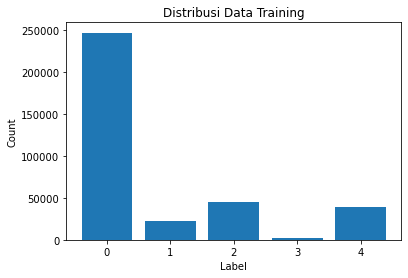

In [9]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = train_data['Label'].value_counts() 

# get x and y data 
points = data.index 
frequency = data.values 

# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Distribusi Data Training') 
ax.set_xlabel('Label') 
ax.set_ylabel('Count')

In [10]:
train_data.to_csv(output_path+'/TrainData.csv')

## UnderSampling

In [11]:
col = train_data.drop(['Label'], axis=1)
tar = train_data[['Label']]

In [12]:
col.head(4)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,10/08/2011 04:01:40 PM,59086131,8,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.135396,8.440876e+06,1.478245e+07,41116855.0,269702.0,59086131.0,8.440876e+06,1.478245e+07,41116855.0,269702.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,0,0,0.135396,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2987276.0,0.0,2987276.0,2987276.0,3.282417e+14,6.564834e+14,1.312967e+15,5.999291e+06
1,147.32.84.180-147.32.84.255-137-137-17,147.32.84.180,137,147.32.84.255,137,17,10/08/2011 04:04:23 PM,12452268,38,0,2476.0,0.0,68.0,50.0,65.157895,6.651666,0.0,0.0,0.0,0.000000,198.839280,3.051653,3.365478e+05,4.175364e+05,1763265.0,0.0,12452268.0,3.365478e+05,4.175364e+05,1763265.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,304,0,3.051653,0.000000,50.0,68.0,65.230769,6.579320,4.328745e+01,0,0,0,0,0,0,0,0,0.0,66.947368,65.157895,0.0,0,0,0,1238,19,231,1,65,0,0,0,0,37,8,0.0,0.0,0.0,0.0,1.312967e+15,0.000000e+00,1.312967e+15,1.312967e+15
2,147.32.84.180-147.32.80.9-1025-53-17,147.32.84.180,1025,147.32.80.9,53,17,10/08/2011 04:04:24 PM,118741070,6,3,192.0,660.0,45.0,22.0,32.000000,10.545141,461.0,97.0,220.0,208.727095,7.175276,0.075795,1.484263e+07,4.093289e+07,116128125.0,6.0,118404514.0,2.368090e+07,5.170040e+07,116148894.0,6.0,118740445.0,5.937022e+07,8.074377e+07,116464687.0,2275758.0,0,0,0,0,48,24,0.050530,0.025265,22.0,461.0,87.400000,134.631349,1.812560e+04,0,0,0,0,0,0,0,0,0.0,97.111111,32.000000,220.0,0,0,0,0,0,0,0,21,0,73,0,0,5,8,2276383.0,0.0,2276383.0,2276383.0,6.564836e+14,9.284078e+14,1.312967e+15,1.161281e+08
3,147.32.84.180-94.63.149.152-1040-80-6,147.32.84.180,1040,94.63.149.152,80,6,10/08/2011 04:06:36 PM,180643,26,10,180.0,25790.0,90.0,0.0,6.923077,24.457184,5840.0,0.0,2579.0,2000.424677,143764.220036,199.288099,5.161229e+03,1.250558e+04,35794.0,4.0,145705.0,5.828200e+03,1.349212e+04,37155.0,4.0,145436.0,1.615956e+04,1.867284e+04,36284.0,9.0,0,0,0,0,536,208,143.930293,55.357805,0.0,5840.0,701.891892,1530.393627,2.342105e+06,1,3,0,4,34,0,0,0,0.0,721.388889,6.923077,2579.0,0,0,0,25970,10,179264,0,5,0,716,64240,5840,2,20,0.0,0.0,0.0,0.0,1.312967e+15,0.000000e+00,1.312967e+15,1.312967e+15


In [13]:
print(col.shape)
print(tar.shape)

(356156, 83)
(356156, 1)


In [14]:
tar=tar.astype('int')
tar.dtypes

Label    int64
dtype: object

In [15]:
#UnderSampling
X_res, Y_res = rus.fit_resample(col, tar)

In [16]:
trainResampling = pd.concat([X_res, Y_res],axis=1)
trainResampling.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,203.73.24.75-192.168.2.109-80-2121-6,203.73.24.75,80,192.168.2.109,2121,6,12/06/2010 09:33:30 PM,824776,5,2,592.0,72.0,592.0,0.0,118.400000,264.750449,72.0,0.0,36.000000,50.911688,805.067073,8.487153,1.374627e+05,2.037714e+05,464763.0,7.0,824776.0,2.061940e+05,2.245934e+05,465194.0,7.0,196.0,196.000000,0.000000,196.0,196.0,0,0,0,0,116,40,6.062252,2.424901,0.0,592.0,83.000000,207.204523,42933.714286,1,2,0,2,6,0,0,0,0.0,94.857143,118.400000,36.000000,0,0,0,0,0,0,0,84,0,10,64240,64240,1,20,0.0,0.0,0.0,0.0,1.276353e+15,0.000000e+00,1.276353e+15,1.276353e+15,0
1,192.168.2.111-66.179.20.163-3655-80-6,192.168.2.111,3655,66.179.20.163,80,6,12/06/2010 11:05:38 PM,49287464,3,0,44.0,0.0,44.0,0.0,14.666667,25.403412,0.0,0.0,0.000000,0.000000,0.892722,0.060867,2.464373e+07,3.485129e+07,49287314.0,150.0,49287464.0,2.464373e+07,3.485129e+07,49287314.0,150.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,60,0,0.060867,0.000000,0.0,44.0,11.000000,22.000000,484.000000,1,0,0,1,3,0,0,0,0.0,14.666667,14.666667,0.000000,0,0,0,0,0,0,1,14,0,0,63983,0,1,20,0.0,0.0,0.0,0.0,6.381794e+14,9.025219e+14,1.276359e+15,4.928731e+07,0
2,203.73.24.75-192.168.2.109-80-3828-6,203.73.24.75,80,192.168.2.109,3828,6,13/06/2010 07:05:34 AM,2922422,42,22,56797.0,62.0,1460.0,0.0,1352.309524,380.249115,62.0,0.0,2.818182,13.218444,19456.122353,21.899644,4.638765e+04,1.767560e+05,1320971.0,160.0,2922422.0,7.127859e+04,2.168977e+05,1320971.0,3122.0,2673104.0,127290.666667,340020.473297,1557368.0,201.0,0,0,0,0,856,440,14.371641,7.528002,0.0,1460.0,874.753846,718.086695,515648.500962,1,2,0,3,63,0,0,0,0.0,888.421875,1352.309524,2.818182,0,0,0,56797,39,50580,0,887,0,0,64240,64240,39,20,0.0,0.0,0.0,0.0,1.276388e+15,0.000000e+00,1.276388e+15,1.276388e+15,0
3,192.168.4.121-192.168.5.122-51526-143-6,192.168.4.121,51526,192.168.5.122,143,6,12/06/2010 11:19:52 AM,31006,14,26,339.0,3622.0,172.0,0.0,24.214286,43.865491,466.0,0.0,139.307692,158.768956,127749.467845,1290.072889,7.950256e+02,1.502608e+03,9574.0,43.0,31006.0,2.385077e+03,2.656102e+03,10698.0,43.0,28862.0,1154.480000,1974.791363,10192.0,149.0,0,0,0,0,292,544,451.525511,838.547378,0.0,466.0,96.609756,140.117251,19632.843902,1,3,0,33,39,0,0,0,1.0,99.025000,24.214286,139.307692,0,0,0,3961,33,133102,0,8,0,90,8192,54,11,20,0.0,0.0,0.0,0.0,1.276316e+15,0.000000e+00,1.276316e+15,1.276316e+15,0
4,172.16.2.13-82.255.155.203-2069-6047-6,172.16.2.13,2069,82.255.155.203,6047,6,08/10/2007 09:25:41 PM,44055886,11,10,239.0,239.0,42.0,0.0,21.727273,19.779236,42.0,0.0,23.900000,19.868736,10.849856,0.476667,2.202794e+06,9.469376e+06,42432564.0,30.0,44055886.0,4.405589e+06,1.336185e+07,42432564.0,30.0,1362251.0,151361.222222,65383.010868,242985.0,30607.0,0,0,0,0,22

In [17]:
print("Before UnderSampling: ", tar.value_counts())
print("After UnderSampling: ", Y_res.value_counts())
print(trainResampling.shape)

Before UnderSampling:  Label
0        247089
2         45342
4         39485
1         22492
3          1748
dtype: int64
After UnderSampling:  Label
0        1748
1        1748
2        1748
3        1748
4        1748
dtype: int64
(8740, 84)


In [18]:
trainResampling.to_csv(output_path+'/TrainDataUnderSampling.csv')

# Testing

In [19]:
test_data = pd.read_csv(dataset_path+'/Botnet-Testing.csv')
test_data.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,01/01/1970 07:00:06 AM,61804233,13,0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.210342,5.150353e+06,4.942438e+06,15120887.0,107769.0,61804233.0,5.150353e+06,4.942438e+06,15120887.0,107769.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.210342,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.0000,0.0000,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,910704.5,280640.074851,1109147.0,712262.0,8.715683e+06,3.826949e+06,1.512089e+07,5.587976e+06,NeedManualLabel
1,147.32.84.180-147.32.84.171-1040-139-6,147.32.84.180,1040,147.32.84.171,139,6,11/08/2011 03:33:48 PM,14119,10,10,1021.0,807.0,276.0,0.0,102.1000,94.277899,304.0,0.0,80.7000,92.492702,129470.925703,1416.530916,7.431053e+02,1.697691e+03,7593.0,72.0,14119.0,1.568778e+03,2.380197e+03,7793.0,178.0,13800.0,1533.333333,2374.061499,7765.0,184.0,0,0,0,0,208,208,708.265458,708.265458,0.0,304.0,87.047619,91.442592,8361.747619,1,2,0,16,19,0,0,0,1.0,91.4000,102.1000,80.7000,0,0,0,1828,16,133489,0,51,0,40,64240,8576,8,20,0.0,0.000000,0.0,0.0,1.313052e+15,0.000000e+00,1.313052e+15,1.313052e+15,NeedManualLabel
2,147.32.84.180-147.32.84.19-1041-139-6,147.32.84.180,1041,147.32.84.19,139,6,11/08/2011 03:33:48 PM,40800,4,4,209.0,85.0,137.0,0.0,52.2500,65.910925,81.0,0.0,21.2500,39.877939,7205.882353,196.078431,5.828571e+03,1.113709e+04,30791.0,187.0,40800.0,1.360000e+04,1.532347e+04,31197.0,3199.0,9822.0,3274.000000,1845.207576,5148.0,1459.0,0,0,0,0,88,88,98.039216,98.039216,0.0,137.0,32.666667,51.144403,2615.750000,1,2,0,4,7,0,0,0,1.0,36.7500,52.2500,21.2500,0,0,0,294,4,43171,0,26,0,10,64240,6432,2,20,0.0,0.000000,0.0,0.0,1.313052e+15,0.000000e+00,1.313052e+15,1.313052e+15,NeedManualLabel
3,147.32.84.180-147.32.84.19-1042-139-6,147.32.84.180,1042,147.32.84.19,139,6,11/08/2011 03:33:48 PM,44000,4,4,209.0,85.0,137.0,0.0,52.2500,65.910925,81.0,0.0,21.2500,39.877939,6681.818182,181.818182,6.285714e+03,1.102003e+04,30711.0,252.0,44000.0,1.466667e+04,1.431742e+04,31199.0,6400.0,13037.0,4345.666667,2625.225578,6465.0,1409.0,0,0,0,0,88,88,90.909091,90.909091,0.0,137.0,32.666667,51.144403,2615.750000,1,2,0,4,7,0,0,0,1.0,36.7500,52.2500,21.2500,0,0,0,294,4,42682,0,26,0,10,64240,6432,2,20,0.0,0.000000,0.0,0.0,1.313052e+15,0.000000e+00,1.313052e+15,1.313052e+15,NeedManualLabel
4,147.32.84.180-147.32.84.171-1043-139-6,147.32.84.180,1043,147.32.84.171,139,6,11/08/2011 03:34:03 PM,56403,16,16,1859.0,1675.0,276.0,0.0,116.1875,94.871294,360.0,0.0,104.6875,115.187221,62656.241689,567.345709,1.819452e+03,3.344010e+03,15710.0,86.0,56403.0,3.760200e+03,4.545904e+03,16800.0,272.0,51709.0,3447.266667,4508.752337,16577.0,291.0,0,0,0,0,328,328,283.672854,283.

In [20]:
test_data.shape

(309207, 84)

## Handling Missing Drop

In [21]:
#handling missing drop
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

#train_data.dropna(inplace=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
test_data.isnull().sum()

Flow ID                        0
Src IP                         0
Src Port                       0
Dst IP                         0
Dst Port                       0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packet               0
Total Bwd packets              0
Total Length of Fwd Packet     0
Total Length of Bwd Packet     0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                  20
Flow Packets/s                20
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Mi

In [22]:
test_data.dropna(inplace=True)
test_data.isnull().sum()

Flow ID                       0
Src IP                        0
Src Port                      0
Dst IP                        0
Dst Port                      0
Protocol                      0
Timestamp                     0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT 

In [23]:
#Neris
test_data.loc[(test_data['Src IP']=='147.32.84.180')| 
               (test_data['Dst IP']=='147.32.84.180'), 'Label'] = 1
#Rbot
test_data.loc[(test_data['Src IP']=='147.32.84.170') | 
               (test_data['Dst IP']=='147.32.84.170'), 'Label'] = 2
#virut
test_data.loc[(test_data['Src IP']=='147.32.84.160')| 
               (test_data['Dst IP']=='147.32.84.160'), 'Label'] = 3
#irc
test_data.loc[(test_data['Src IP']=='192.168.5.122') & (test_data['Dst IP']=='198.164.30.2'), 'Label'] = 4
test_data.loc[(test_data['Src IP']=='192.168.2.110') & (test_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
test_data.loc[(test_data['Src IP']=='192.168.4.118') & (test_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
test_data.loc[(test_data['Src IP']=='192.168.2.113') & (test_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
test_data.loc[(test_data['Src IP']=='192.168.1.103') & (test_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
test_data.loc[(test_data['Src IP']=='192.168.4.120') & (test_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
test_data.loc[(test_data['Src IP']=='192.168.2.112') & (test_data['Dst IP']=='192.168.2.113'), 'Label'] = 4
test_data.loc[(test_data['Src IP']=='192.168.1.105') & (test_data['Dst IP']=='192.168.5.122'), 'Label'] = 4
#menti
test_data.loc[(test_data['Src IP']=='147.32.84.150') | (test_data['Dst IP']=='147.32.84.150'), 'Label'] = 5
#sogou
test_data.loc[(test_data['Src IP']=='147.32.84.140') | (test_data['Dst IP']=='147.32.84.140'), 'Label'] = 6
#murlo
test_data.loc[(test_data['Src IP']=='147.32.84.130') | (test_data['Dst IP']=='147.32.84.130'), 'Label'] = 7
#blackhole
test_data.loc[(test_data['Src IP']=='10.0.2.15') | (test_data['Dst IP']=='10.0.2.15'), 'Label'] = 8
test_data.loc[(test_data['Src IP']=='192.168.106.141') | (test_data['Dst IP']=='192.168.106.141'), 'Label'] = 8
test_data.loc[(test_data['Src IP']=='192.168.106.131') | (test_data['Dst IP']=='192.168.106.131'), 'Label'] = 8
#tbot
test_data.loc[(test_data['Src IP']=='172.16.253.130') | (test_data['Dst IP']=='172.16.253.130'), 'Label'] = 9
test_data.loc[(test_data['Src IP']=='172.16.253.131') | (test_data['Dst IP']=='172.16.253.131'), 'Label'] = 9
test_data.loc[(test_data['Src IP']=='172.16.253.129') | (test_data['Dst IP']=='172.16.253.129'), 'Label'] = 9
test_data.loc[(test_data['Src IP']=='172.16.253.240') | (test_data['Dst IP']=='172.16.253.240'), 'Label'] = 9
#weasel
test_data.loc[(test_data['Src IP']=='74.78.117.238') | (test_data['Dst IP']=='74.78.117.238'), 'Label'] = 10
test_data.loc[(test_data['Src IP']=='158.65.110.24') | (test_data['Dst IP']=='158.65.110.24'), 'Label'] = 10
#zeus
test_data.loc[(test_data['Src IP']=='192.168.3.35') | (test_data['Dst IP']=='192.168.3.35'), 'Label'] = 11
test_data.loc[(test_data['Src IP']=='192.168.3.25') | (test_data['Dst IP']=='192.168.3.25'), 'Label'] = 11
test_data.loc[(test_data['Src IP']=='192.168.3.65') | (test_data['Dst IP']=='192.168.3.65'), 'Label'] = 11
test_data.loc[(test_data['Src IP']=='172.29.0.116') | (test_data['Dst IP']=='172.29.0.116'), 'Label'] = 11
#zero access
test_data.loc[(test_data['Src IP']=='172.16.253.132') | (test_data['Dst IP']=='172.16.253.132'), 'Label'] = 12
test_data.loc[(test_data['Src IP']=='192.168.248.165') | (test_data['Dst IP']=='192.168.248.165'), 'Label'] = 12
#trojan
test_data.loc[(test_data['Src IP']=='172.29.0.109') | (test_data['Dst IP']=='172.29.0.109'), 'Label'] = 13
#smoke
test_data.loc[(test_data['Src IP']=='10.37.130.4') | (test_data['Dst IP']=='10.37.130.4'), 'Label'] = 14
#normal
test_data.loc[(test_data['Label']=='NeedManualLabel'), 'Label'] = 0

In [24]:
test_data['Label'].value_counts()

0     127891
10     85502
3      42725
1      26663
7      12946
5       4970
4       4105
12      1828
9        967
8        747
11       424
2        226
14        84
6         82
13        27
Name: Label, dtype: int64

In [25]:
test_data.to_csv(output_path+'/TestData.csv')

## UnderSampling

In [26]:
col = test_data.drop(['Label'], axis=1)
tar = test_data[['Label']]

In [27]:
col.head(4)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,01/01/1970 07:00:06 AM,61804233,13,0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.210342,5.150353e+06,4.942438e+06,15120887.0,107769.0,61804233.0,5.150353e+06,4.942438e+06,15120887.0,107769.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.210342,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,910704.5,280640.074851,1109147.0,712262.0,8.715683e+06,3.826949e+06,1.512089e+07,5.587976e+06
1,147.32.84.180-147.32.84.171-1040-139-6,147.32.84.180,1040,147.32.84.171,139,6,11/08/2011 03:33:48 PM,14119,10,10,1021.0,807.0,276.0,0.0,102.10,94.277899,304.0,0.0,80.70,92.492702,129470.925703,1416.530916,7.431053e+02,1.697691e+03,7593.0,72.0,14119.0,1.568778e+03,2.380197e+03,7793.0,178.0,13800.0,1533.333333,2374.061499,7765.0,184.0,0,0,0,0,208,208,708.265458,708.265458,0.0,304.0,87.047619,91.442592,8361.747619,1,2,0,16,19,0,0,0,1.0,91.40,102.10,80.70,0,0,0,1828,16,133489,0,51,0,40,64240,8576,8,20,0.0,0.000000,0.0,0.0,1.313052e+15,0.000000e+00,1.313052e+15,1.313052e+15
2,147.32.84.180-147.32.84.19-1041-139-6,147.32.84.180,1041,147.32.84.19,139,6,11/08/2011 03:33:48 PM,40800,4,4,209.0,85.0,137.0,0.0,52.25,65.910925,81.0,0.0,21.25,39.877939,7205.882353,196.078431,5.828571e+03,1.113709e+04,30791.0,187.0,40800.0,1.360000e+04,1.532347e+04,31197.0,3199.0,9822.0,3274.000000,1845.207576,5148.0,1459.0,0,0,0,0,88,88,98.039216,98.039216,0.0,137.0,32.666667,51.144403,2615.750000,1,2,0,4,7,0,0,0,1.0,36.75,52.25,21.25,0,0,0,294,4,43171,0,26,0,10,64240,6432,2,20,0.0,0.000000,0.0,0.0,1.313052e+15,0.000000e+00,1.313052e+15,1.313052e+15
3,147.32.84.180-147.32.84.19-1042-139-6,147.32.84.180,1042,147.32.84.19,139,6,11/08/2011 03:33:48 PM,44000,4,4,209.0,85.0,137.0,0.0,52.25,65.910925,81.0,0.0,21.25,39.877939,6681.818182,181.818182,6.285714e+03,1.102003e+04,30711.0,252.0,44000.0,1.466667e+04,1.431742e+04,31199.0,6400.0,13037.0,4345.666667,2625.225578,6465.0,1409.0,0,0,0,0,88,88,90.909091,90.909091,0.0,137.0,32.666667,51.144403,2615.750000,1,2,0,4,7,0,0,0,1.0,36.75,52.25,21.25,0,0,0,294,4,42682,0,26,0,10,64240,6432,2,20,0.0,0.000000,0.0,0.0,1.313052e+15,0.000000e+00,1.313052e+15,1.313052e+15


In [28]:
print(col.shape)
print(tar.shape)

(309187, 83)
(309187, 1)


In [29]:
tar=tar.astype('int')
tar.dtypes

Label    int64
dtype: object

In [30]:
#UnderSampling
X_res, Y_res = rus.fit_resample(col, tar)

In [31]:
testResampling = pd.concat([X_res, Y_res],axis=1)
testResampling.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.16.0.11-212.95.7.75-4539-53-17,172.16.0.11,4539,212.95.7.75,53,17,07/10/2010 05:10:25 AM,68216,1,1,46.0,237.0,46.0,46.0,46.0,0.0,237.0,237.0,237.0,0.0,4148.586842,29.318635,68216.0,0.000000,68216.0,68216.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,14.659317,14.659317,46.0,237.0,109.666667,110.273901,12160.333333,0,0,0,0,0,0,0,0,1.0,164.5,46.0,237.0,0,0,0,0,0,0,0,23,0,118,0,0,0,8,0.0,0.0,0.0,0.0,1.286403e+15,0.0,1.286403e+15,1.286403e+15,0
1,158.65.110.212-239.255.255.250-50121-1900-17,158.65.110.212,50121,239.255.255.250,1900,17,12/10/2012 07:16:45 AM,15047465,6,0,324.0,0.0,54.0,54.0,54.0,0.0,0.0,0.0,0.0,0.0,21.531866,0.398738,3009493.0,11048.763279,3025692.0,2995034.0,15047465.0,3009493.0,11048.763279,3025692.0,2995034.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,48,0,0.398738,0.000000,54.0,54.0,54.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,63.0,54.0,0.0,0,0,0,0,0,0,1,54,0,0,0,0,5,8,0.0,0.0,0.0,0.0,1.350001e+15,0.0,1.350001e+15,1.350001e+15,0
2,172.16.0.11-212.95.7.75-2795-53-17,172.16.0.11,2795,212.95.7.75,53,17,07/10/2010 05:09:49 AM,77108,1,1,38.0,151.0,38.0,38.0,38.0,0.0,151.0,151.0,151.0,0.0,2451.107537,25.937646,77108.0,0.000000,77108.0,77108.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,12.968823,12.968823,38.0,151.0,75.666667,65.240580,4256.333333,0,0,0,0,0,0,0,0,1.0,113.5,38.0,151.0,0,0,0,0,0,0,0,19,0,75,0,0,0,8,0.0,0.0,0.0,0.0,1.286403e+15,0.0,1.286403e+15,1.286403e+15,0
3,172.16.0.11-66.186.178.177-10131-25-6,172.16.0.11,10131,66.186.178.177,25,6,07/10/2010 05:12:24 AM,205,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9756.097561,205.0,0.000000,205.0,205.0,205.0,205.0,0.000000,205.0,205.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,9756.097561,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,2,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,65347,0,0,20,0.0,0.0,0.0,0.0,1.286403e+15,0.0,1.286403e+15,1.286403e+15,0
4,172.16.2.11-10.0.0.254-23464-53-17,172.16.2.11,23464,10.0.0.254,53,17,19/03/2008 09:17:51 PM,53527,1,1,40.0,56.0,40.0,40.0,40.0,0.0,56.0,56.0,56.0,0.0,1793.487399,37.364321,53527.0,0.000000,53527.0,53527.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,18.682160,18.682160,40.0,56.0,45.333333,9.237604,85.333333,0,0,0,0,0,0,0,0,1.0,68.0,40.0,56.0,0,0,0,0,0,0,0,20,0,28,0,0,0,8,0.0,0.0,0.0,0.0,1.205936e+15,0.0,1.205936e+15,1.205936e+15,0


In [32]:
print("Before UnderSampling: ", tar.value_counts())
print("After UnderSampling: ", Y_res.value_counts())
print(testResampling.shape)

Before UnderSampling:  Label
0        127891
10        85502
3         42725
1         26663
7         12946
5          4970
4          4105
12         1828
9           967
8           747
11          424
2           226
14           84
6            82
13           27
dtype: int64
After UnderSampling:  Label
0        27
1        27
2        27
3        27
4        27
5        27
6        27
7        27
8        27
9        27
10       27
11       27
12       27
13       27
14       27
dtype: int64
(405, 84)


In [33]:
testResampling.to_csv(output_path+'/TestDataUnderSampling.csv')